In [1]:
#pip install pycaret

In [2]:
import pycaret
pycaret.__version__

'3.3.2'

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from pycaret.regression import compare_models
from pycaret.regression import setup
from pycaret.regression import plot_model
import matplotlib.pyplot as plt

In [36]:
# Load the dataset
df = pd.read_csv('abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                                        'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

# Calculate the target variable (age)
df['Age'] = df['Rings'] + 1.5

# Drop the 'Rings' column as we're using 'Age' as our target
df = df.drop('Rings', axis=1)

# Convert 'Sex' to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

print(df.head())
print(df.info())

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight   Age  Sex_I  Sex_M  
0         0.150  16.5  False   True  
1         0.070   8.5  False   True  
2         0.210  10.5  False  False  
3         0.155  11.5  False   True  
4         0.055   8.5   True  False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Sex_I  Sex_M   Age  
0         0.150  False   True  16.5  
1         0.070  False   True   8.5  
2         0.210  False  False  10.5  
3         0.155  False   True  11.5  
4         0.055   True  False   8.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4

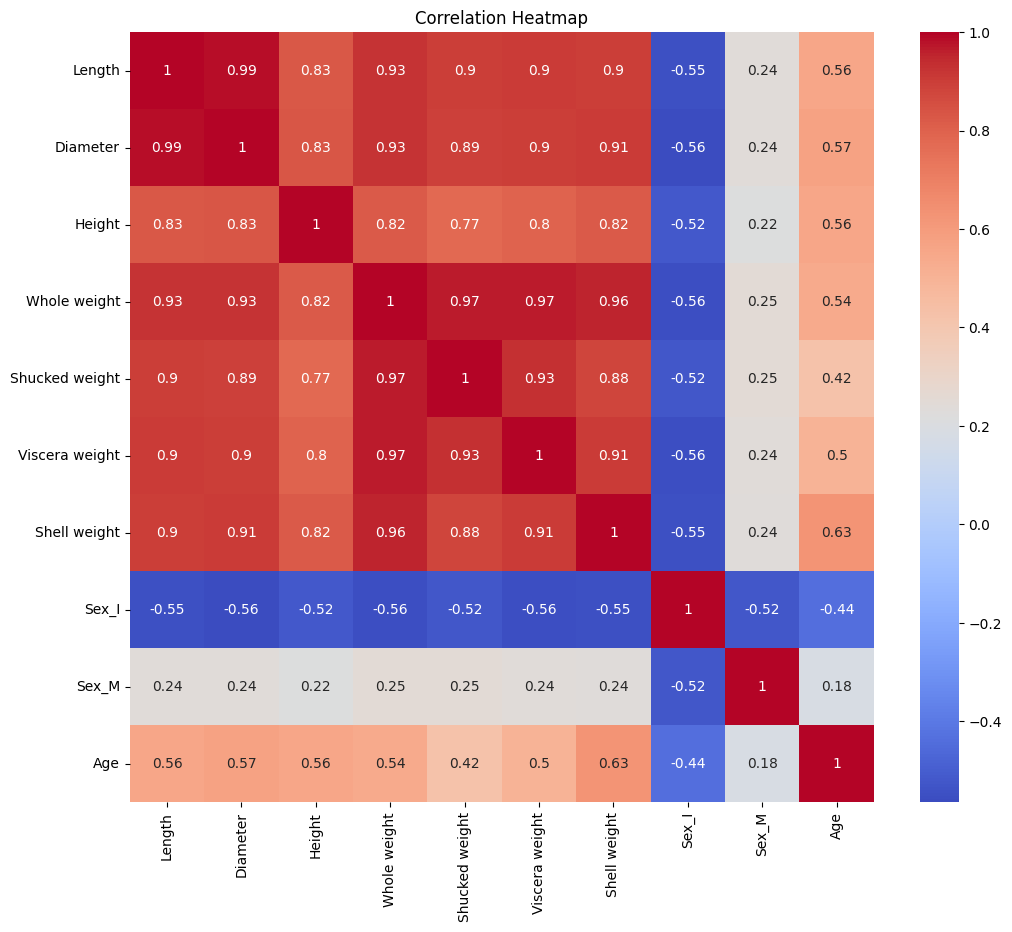

In [20]:
print(df.head())
print(df.info())
print(df.describe())

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
X = df.drop('Age', axis=1)
y = df['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")

Root Mean Squared Error: 2.2116
R-squared Score: 0.5482


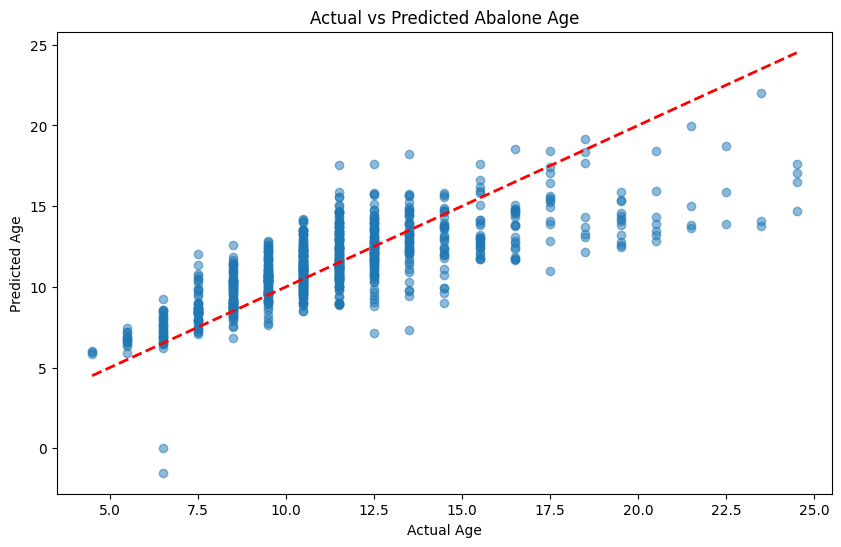

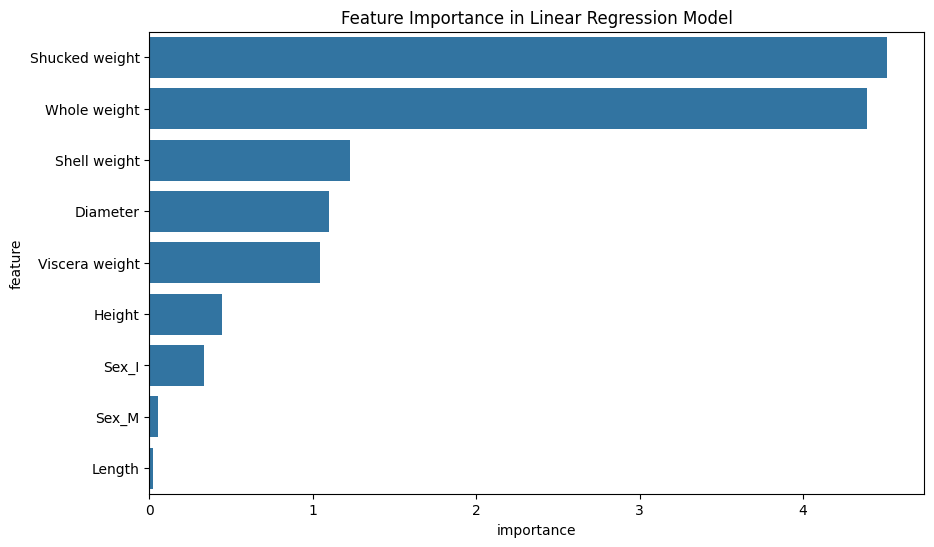

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Abalone Age")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Linear Regression Model')
plt.show()

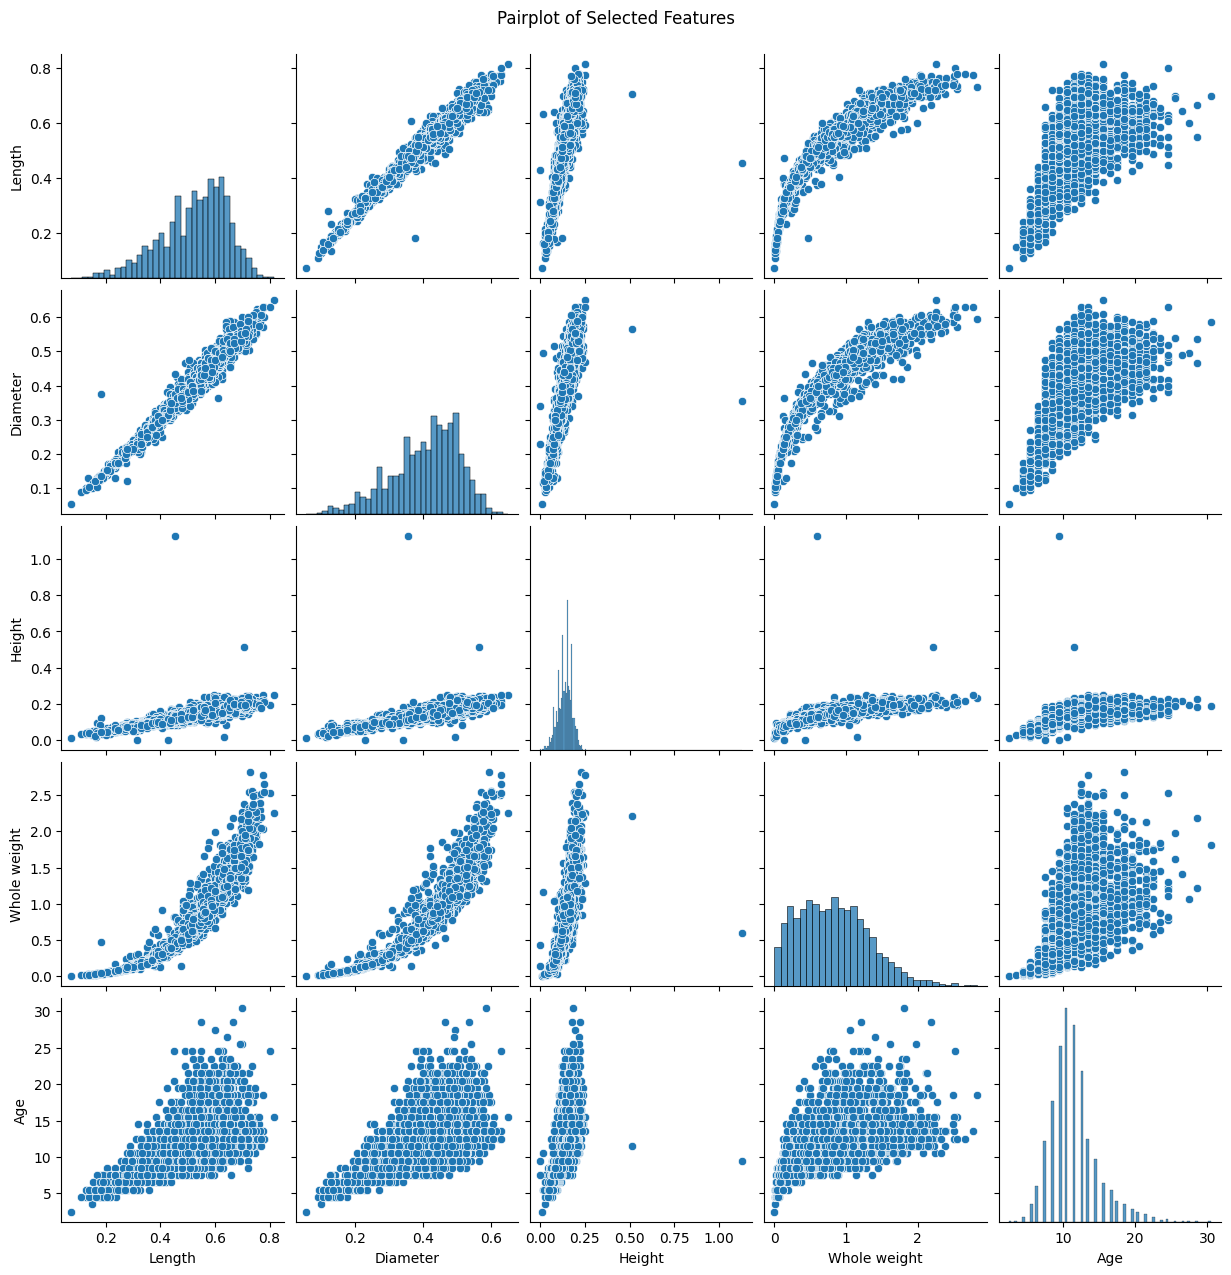

In [22]:
sns.pairplot(df[['Length', 'Diameter', 'Height', 'Whole weight', 'Age']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [25]:
reg = setup(data=df, target='Age', normalize=True, session_id=123)

,Description,Value
0,Session id,123
1,Target,Age
2,Target type,Regression
3,Original data shape,"(4177, 10)"
4,Transformed data shape,"(4177, 10)"
5,Transformed train set shape,"(2923, 10)"
6,Transformed test set shape,"(1254, 10)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [28]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.5375,4.7052,2.1667,0.5464,0.1544,0.1307,1.4010
gbr,Gradient Boosting Regressor,1.5253,4.7125,2.1688,0.5462,0.1535,0.1293,0.6040
et,Extra Trees Regressor,1.5587,4.8186,2.1938,0.5353,0.1559,0.1322,0.9000
lightgbm,Light Gradient Boosting Machine,1.5613,4.8512,2.2000,0.5330,0.1558,0.1318,0.3880
ridge,Ridge Regression,1.5987,5.0205,2.2377,0.5165,0.1626,0.1367,0.0420
lr,Linear Regression,1.5990,5.0204,2.2377,0.5164,0.1633,0.1367,0.5030
lar,Least Angle Regression,1.5990,5.0204,2.2377,0.5164,0.1633,0.1367,0.0400
br,Bayesian Ridge,1.5988,5.0213,2.2379,0.5164,0.1626,0.1367,0.0470
huber,Huber Regressor,1.5654,5.0517,2.2460,0.5144,0.1599,0.1294,0.1080
xgboost,Extreme Gradient Boosting,1.6067,5.0900,2.2529,0.5088,0.1608,0.1362,0.1640


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

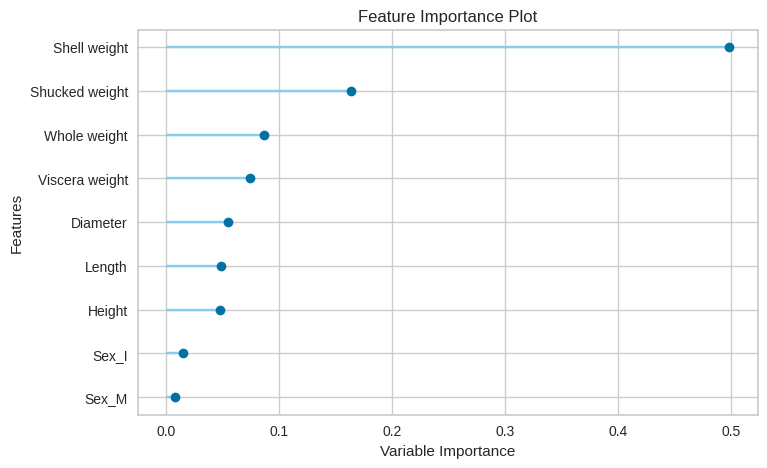

In [31]:
plot_model(best_model, plot='feature')

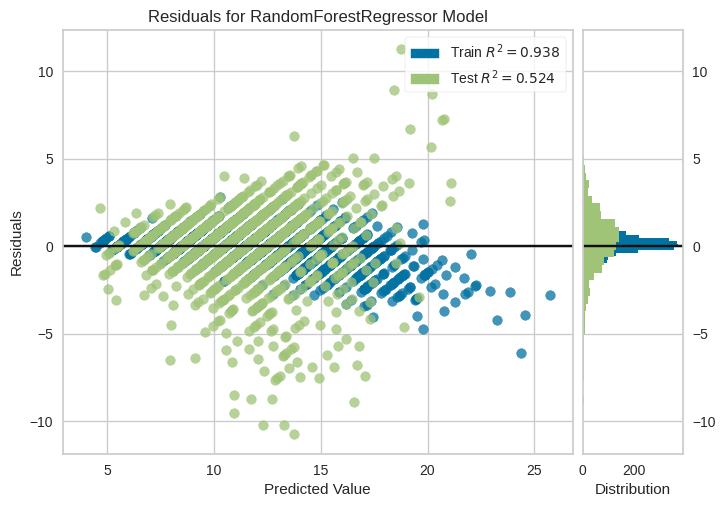

In [32]:
plot_model(best_model, plot='residuals')

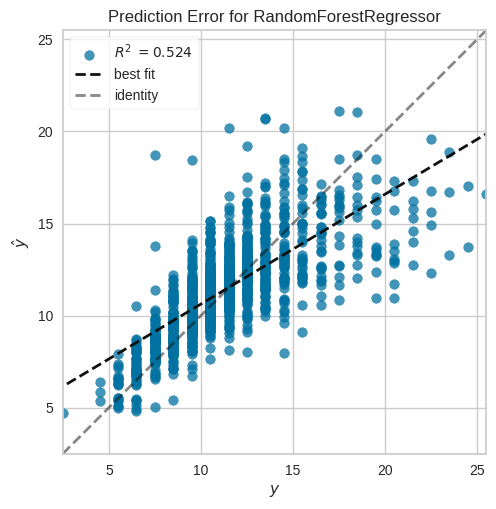

In [33]:
plot_model(best_model, plot='error')

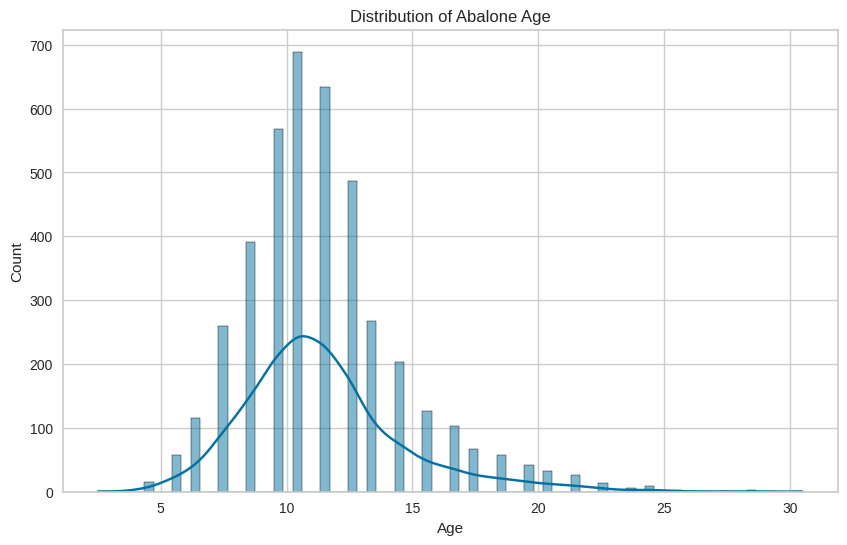

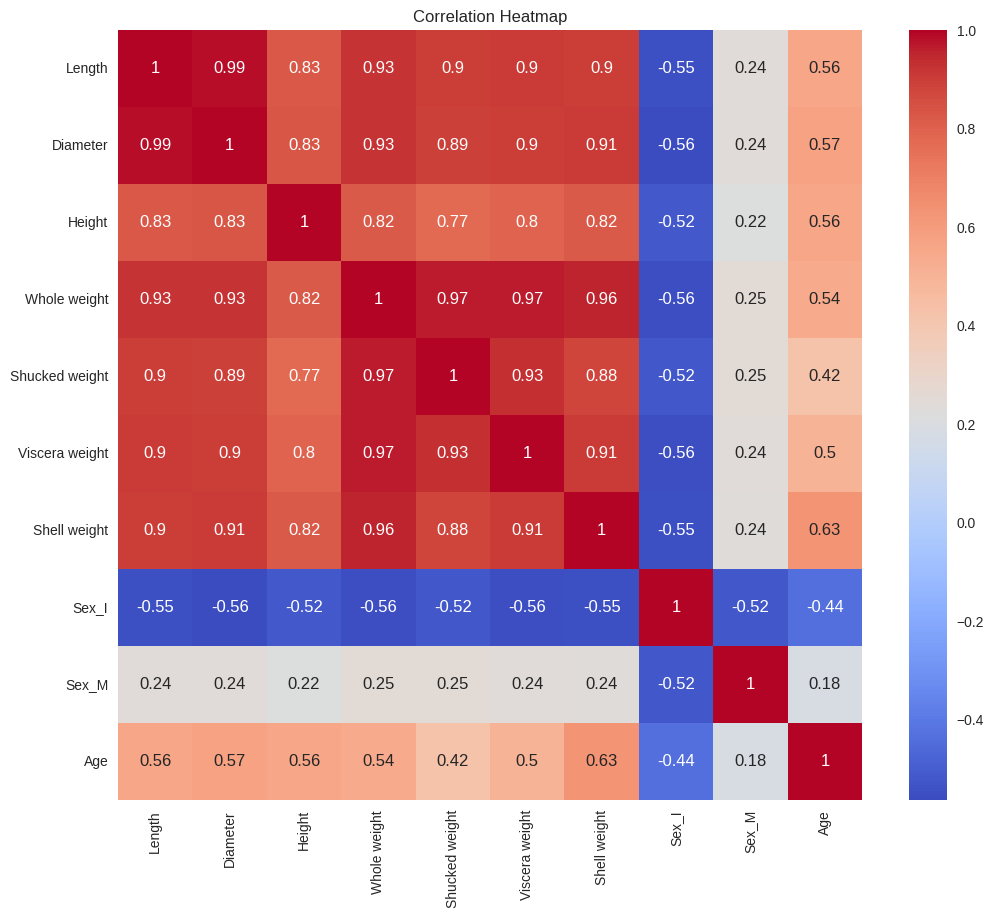

,Description,Value
0,Session id,123
1,Target,Age
2,Target type,Regression
3,Original data shape,"(4177, 10)"
4,Transformed data shape,"(4177, 10)"
5,Transformed train set shape,"(2923, 10)"
6,Transformed test set shape,"(1254, 10)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.5375,4.7044,2.1666,0.5464,0.1544,0.1307,1.5110
gbr,Gradient Boosting Regressor,1.5255,4.7134,2.1690,0.5461,0.1535,0.1293,0.4220
et,Extra Trees Regressor,1.5587,4.8189,2.1939,0.5353,0.1559,0.1322,0.9050
lightgbm,Light Gradient Boosting Machine,1.5548,4.8294,2.1948,0.5351,0.1554,0.1313,0.6030
ridge,Ridge Regression,1.5970,4.9138,2.2152,0.5275,0.1602,0.1365,0.0350
br,Bayesian Ridge,1.5983,5.0029,2.2342,0.5182,0.1630,0.1367,0.0360
lr,Linear Regression,1.5990,5.0204,2.2377,0.5164,0.1633,0.1367,0.7170
knn,K Neighbors Regressor,1.5709,5.0283,2.2408,0.5160,0.1586,0.1309,0.0410
huber,Huber Regressor,1.5655,5.0527,2.2462,0.5143,0.1600,0.1294,0.0910
xgboost,Extreme Gradient Boosting,1.6067,5.0900,2.2529,0.5088,0.1608,0.1362,0.2200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=123)


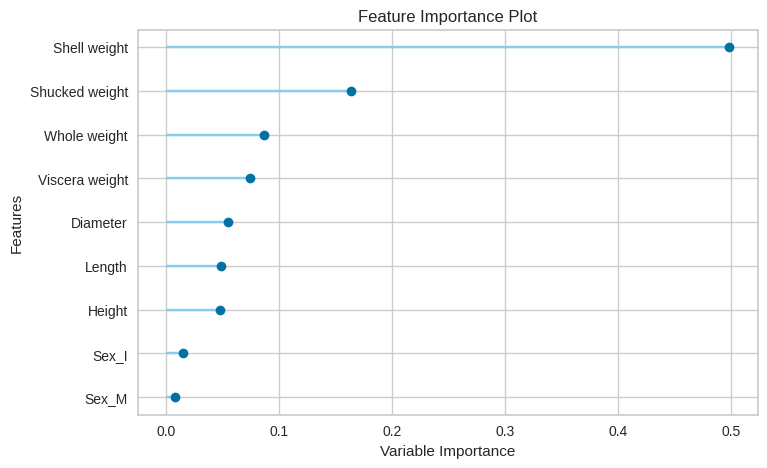

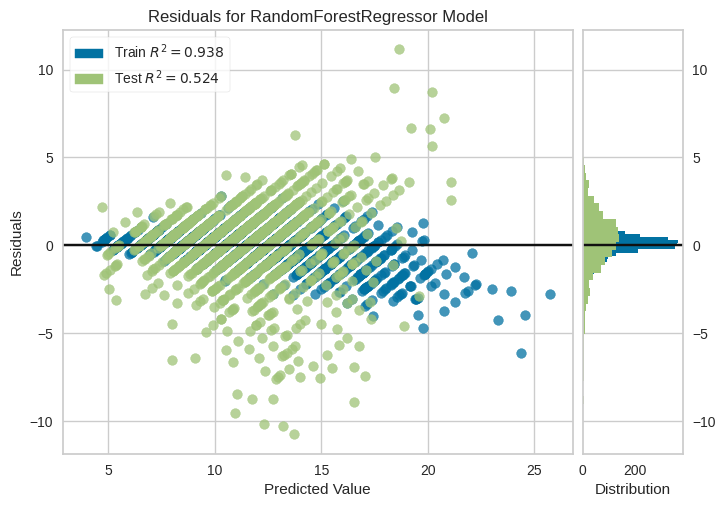

NameError: name 'create_model' is not defined

In [35]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Abalone Age')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Set up the regression experiment
reg = setup(data=df, target='Age', session_id=123)

# Compare models
best_model = compare_models()

# Print the best model
print(best_model)

# Plot feature importance
plot_model(best_model, plot='feature')

# Plot residuals
plot_model(best_model, plot='residuals')

# Create model
final_model = create_model(best_model)

# Evaluate the model
evaluate_model(final_model)

# Make predictions
predictions = predict_model(final_model, data=df)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], predictions['prediction_label'], alpha=0.5)
plt.plot([df['Age'].min(), df['Age'].max()], [df['Age'].min(), df['Age'].max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Abalone Age')
plt.show()

# Save the model
save_model(final_model, 'abalone_age_model')

In [38]:
X = df.drop('Age', axis=1)
y = df['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Linear Regression - RMSE: {:.4f}, R2: {:.4f}".format(lr_rmse, lr_r2))
print("Random Forest - RMSE: {:.4f}, R2: {:.4f}".format(rf_rmse, rf_r2))

Linear Regression - RMSE: 2.2116, R2: 0.5482
Random Forest - RMSE: 2.2624, R2: 0.5272


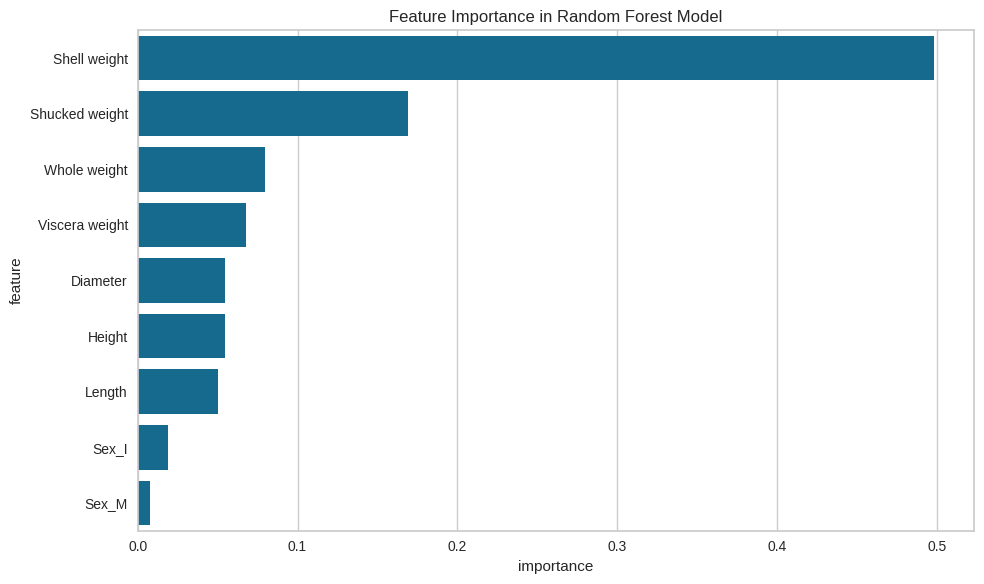

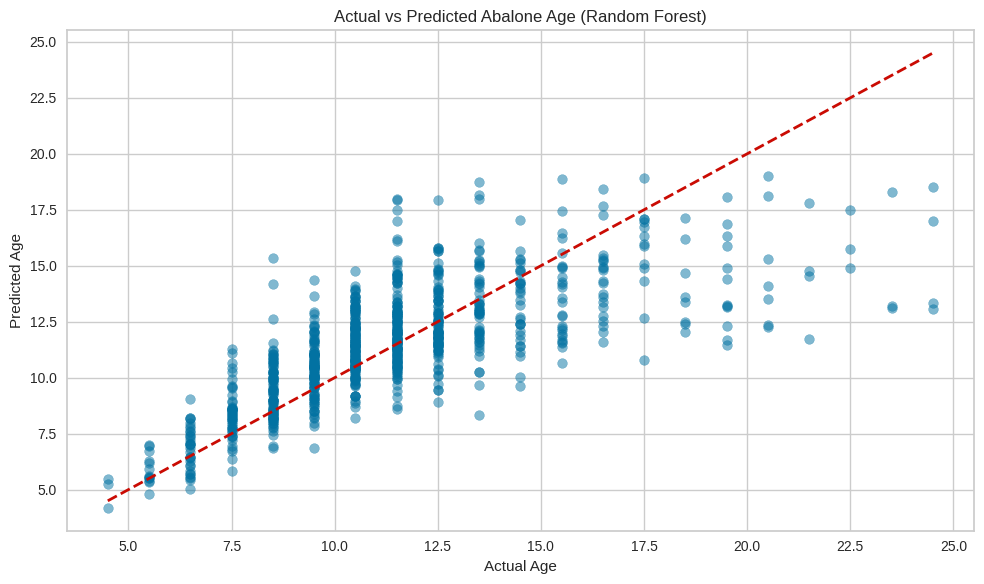

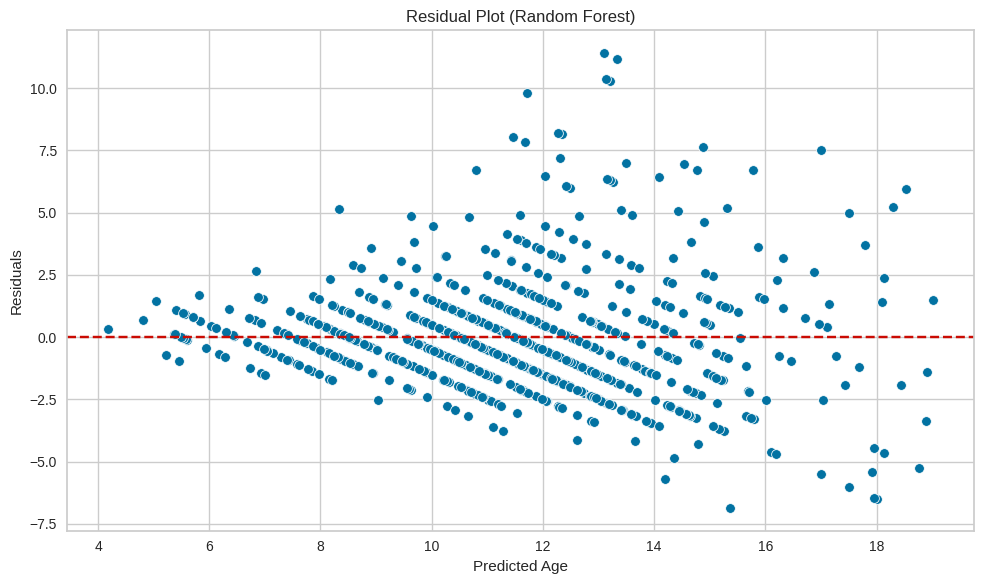

In [40]:
# Feature importance (for Random Forest)
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

# Actual vs Predicted plot (using Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Abalone Age (Random Forest)")
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - rf_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rf_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Age')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.tight_layout()
plt.show()